Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env
import acquire
import wrangle

In [2]:
df = acquire.get_zillow_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 115.0 MB


In [4]:
df.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [5]:
df.isnull().mean()

bedroomcnt                      0.000005
bathroomcnt                     0.000005
calculatedfinishedsquarefeet    0.003941
taxvaluedollarcnt               0.000229
yearbuilt                       0.004337
taxamount                       0.002063
fips                            0.000000
dtype: float64

In [6]:
df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,2.152852e+06,2.152852e+06,2.144379e+06,2.152370e+06,2.143526e+06,2.148421e+06,2.152863e+06
mean,3.287196e+00,2.230688e+00,1.862855e+03,4.618962e+05,1.960950e+03,5.634866e+03,6.048377e+03
std,9.547544e-01,9.992796e-01,1.222125e+03,6.996760e+05,2.216220e+01,8.178910e+03,2.043329e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.801000e+03,1.850000e+00,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.257000e+03,1.881702e+05,1.949000e+03,2.534980e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.623000e+03,3.276710e+05,1.958000e+03,4.108950e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.208000e+03,5.345270e+05,1.976000e+03,6.414320e+03,6.059000e+03
max,2.500000e+01,3.200000e+01,9.525760e+05,9.842891e+07,2.016000e+03,1.337756e+06,6.111000e+03


In [7]:
df[df.bedroomcnt.isnull()]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
107763,NaN,NaN,NaN,67366.0,1926.0,780.54,6059.0
118612,NaN,NaN,NaN,43992.0,1946.0,541.64,6059.0
193993,NaN,NaN,1348.0,840698.0,1952.0,NaN,6059.0
1141339,NaN,NaN,200.0,188972.0,NaN,NaN,6037.0
1324608,NaN,NaN,990.0,435000.0,1906.0,NaN,6037.0
1442975,NaN,NaN,NaN,273196.0,NaN,NaN,6037.0
1647346,NaN,NaN,400.0,28347.0,1954.0,NaN,6037.0
1701026,NaN,NaN,NaN,407930.0,1926.0,NaN,6037.0
1722707,NaN,NaN,NaN,477161.0,NaN,NaN,6037.0
1776422,NaN,NaN,NaN,38855.0,NaN,NaN,6037.0


In [8]:
df[df.yearbuilt.isnull()]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
5,0.0,0.0,NaN,124.0,NaN,NaN,6037.0
...,...,...,...,...,...,...,...
2152823,0.0,0.0,NaN,2568893.0,NaN,27309.30,6059.0
2152844,0.0,0.0,NaN,92679.0,NaN,1090.16,6111.0
2152854,0.0,0.0,NaN,1198476.0,NaN,NaN,6037.0
2152857,0.0,0.0,NaN,1087111.0,NaN,19313.08,6059.0


In [9]:
df[df.fips.isnull()]

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips


#### Takeaway for nulls-
takeaway from exploring nulls - right now it looks appropriate to drop all nulls from the df. It looks like some records have nulls in several columns and the highest null percentage in any column is only 1.6% 

#### Acquire function

function is made for aquiring data. Will not use right now as this query takes a long time, but for future, can use:

#### from acquire import get_zillow_data

In [10]:
df = wrangle.wrangle_zillow(df)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,2140235.0,3.301419,0.932600,0.00,3.00,3.00,4.00,25.00
bathrooms,2140235.0,2.240352,0.990549,0.00,2.00,2.00,3.00,32.00
square_feet,2140235.0,1863.193970,1221.754161,1.00,1258.00,1623.00,2208.00,952576.00
value,2140235.0,460641.625164,677157.635675,22.00,189166.00,328296.00,534606.00,90188462.00
year,2140235.0,1960.967545,22.150563,1801.00,1949.00,1958.00,1976.00,2016.00
tax,2140235.0,5616.711322,7814.562798,6.34,2540.85,4111.47,6411.93,1078101.87
fips,2140235.0,6048.309556,20.344910,6037.00,6037.00,6037.00,6059.00,6111.00


In [12]:
df.isnull().sum()

bedrooms       0
bathrooms      0
square_feet    0
value          0
year           0
tax            0
fips           0
dtype: int64

In [13]:
df.sort_values(by=['value'], ascending=False).tail(20)

,bedrooms,bathrooms,square_feet,value,year,tax,fips
1162301,0.0,0.0,183.0,103.0,1979.0,13.47,6037.0
624123,0.0,0.0,171.0,101.0,1979.0,13.44,6037.0
1012306,0.0,0.0,192.0,46.0,1964.0,119.38,6037.0
2029164,0.0,1.0,180.0,31.0,1992.0,91.13,6037.0
1619739,2.0,1.0,800.0,23.0,1922.0,403.33,6037.0
1326774,0.0,0.0,48.0,23.0,1954.0,97.07,6037.0
2125248,3.0,1.0,1128.0,23.0,1925.0,427.61,6037.0
1509785,0.0,0.0,792.0,23.0,1985.0,99.24,6037.0
422109,0.0,0.0,800.0,23.0,1985.0,99.24,6037.0
1574215,2.0,1.0,924.0,23.0,1949.0,113.50,6037.0


#### takeaways exploring records with very low value-
    
unsure of exact reason for this, but a lot (not all) have low square footage, many are older, but ALL are in the 6037(fips) region

### Visualize univariate data 

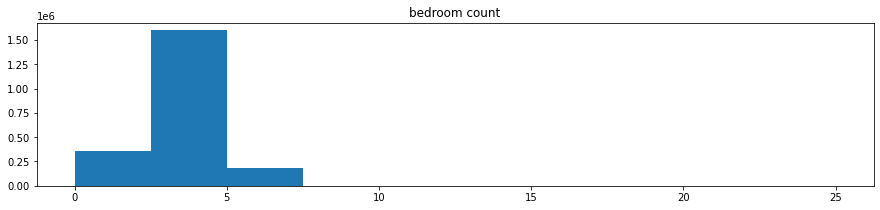

In [14]:
plt.figure(figsize=(15, 3))

plt.title('bedroom count')
df['bedrooms'].hist()
plt.grid(False)

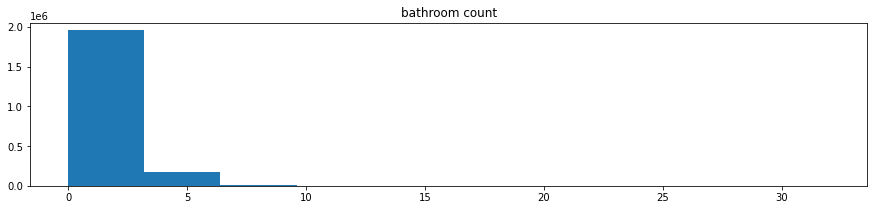

In [15]:
plt.figure(figsize=(15, 3))

plt.title('bathroom count')
df['bathrooms'].hist()
plt.grid(False)

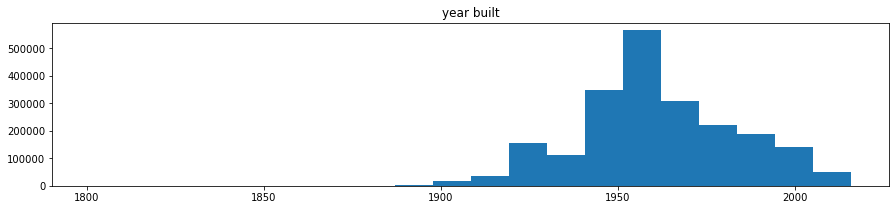

In [16]:
plt.figure(figsize=(15, 3))

plt.title('year built')
df['year'].hist(bins=20)
plt.grid(False)

In [17]:
df = df[df.bathrooms != 0]

In [18]:
df.bathrooms.value_counts()

2.00     942463
3.00     422398
1.00     412582
2.50     142827
4.00      82039
1.50      31157
3.50      28464
5.00      28306
4.50      19474
6.00      10717
5.50       6201
7.00       4381
8.00       1681
6.50       1330
9.00        707
7.50        382
10.00       322
11.00       145
8.50        108
12.00        73
9.50         50
13.00        39
14.00        25
15.00        17
0.50         16
10.50        14
16.00        12
18.00         8
20.00         6
17.00         4
1.75          3
12.50         3
11.50         3
19.50         1
14.50         1
32.00         1
19.00         1
Name: bathrooms, dtype: int64

In [19]:
df.columns

Index(['bedrooms', 'bathrooms', 'square_feet', 'value', 'year', 'tax', 'fips'], dtype='object')

In [20]:
df.square_feet.min(), df.square_feet.max(), df.square_feet.mean()

(1.0, 952576.0, 1863.885997450328)

In [21]:
df = df[df.square_feet > 200]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2135888 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   bedrooms     float64
 1   bathrooms    float64
 2   square_feet  float64
 3   value        float64
 4   year         float64
 5   tax          float64
 6   fips         float64
dtypes: float64(7)
memory usage: 130.4 MB


In [23]:
df= df[df.bathrooms != 1.75]

In [24]:
df = df[df.bedrooms != 0.0]

In [25]:
df = df[df.value > 200.0]

In [26]:
df[df.bedrooms > 11]

,bedrooms,bathrooms,square_feet,value,year,tax,fips
26485,25.0,20.0,11700.0,1608491.0,2010.0,19238.87,6037.0
64488,14.0,7.0,4618.0,877333.0,1942.0,10496.86,6037.0
129015,15.0,9.0,11704.0,919654.0,1903.0,12143.97,6037.0
133100,13.0,8.0,11573.0,573666.0,1912.0,7537.95,6037.0
157547,15.0,7.0,5993.0,1157692.0,1990.0,686.12,6037.0
218551,13.0,5.0,11064.0,7186399.0,1924.0,86478.31,6037.0
250867,12.0,12.0,7636.0,1102738.0,1988.0,13420.04,6037.0
412367,13.0,9.0,8965.0,3235522.0,1933.0,39142.74,6037.0
566518,15.0,7.0,4612.0,999345.0,1990.0,624.43,6037.0
576873,13.0,5.0,5648.0,503388.0,1955.0,833.60,6037.0


In [27]:
df['year'] = df['year'].astype('int')

In [28]:
df['fips'] = df['fips'].astype('int')

In [29]:
df['square_feet'] = df['square_feet'].astype('int')
df['value'] = df['value'].astype('int')

In [30]:
df.columns

Index(['bedrooms', 'bathrooms', 'square_feet', 'value', 'year', 'tax', 'fips'], dtype='object')

In [31]:
# cols = ['bedrooms', 'bathrooms', 'square_feet', 'value', 'year', 'tax', 'fips']

# fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (12, 10))

# for i, item in enumerate(cols):
#      if i < 3:
#             ax = df[item].value_counts().plot(kind = 'bar', color = ["cornflowerblue", "goldenrod"], ax=axes[i,0],rot = 0)
        
#     elif i >=3 and i < 6:
#          ax = df[item].value_counts().plot(kind = 'bar', color = ["cornflowerblue", "goldenrod"], ax=axes[i-3,1],rot = 0)
    
#     elif i < 10:
#          ax = df[item].value_counts().plot(kind = 'bar', color = ["cornflowerblue", "goldenrod"], ax=axes[i-6,2],rot = 0)
 
#      ax.set_title(item)

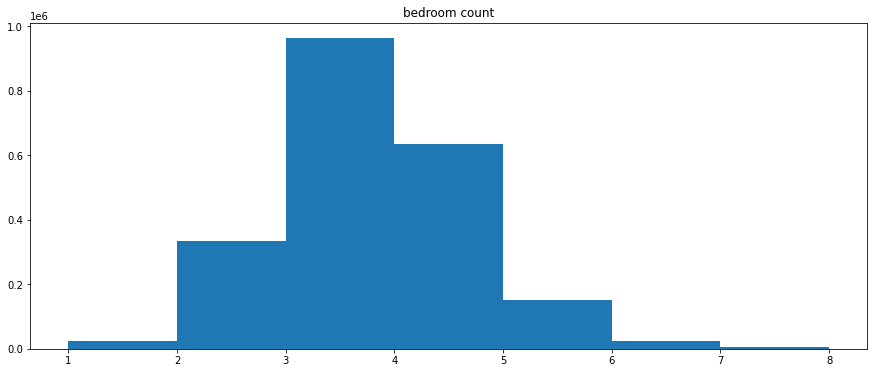

In [32]:
plt.figure(figsize=(15, 6))

plt.title('bedroom count')
df['bedrooms'].hist(bins=[1, 2, 3, 4, 5, 6, 7, 8])
plt.grid(False)

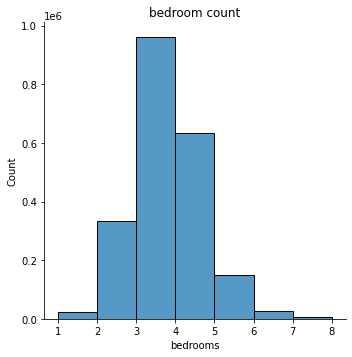

In [33]:
sns.displot(x='bedrooms', data=df, bins=[1, 2, 3, 4, 5, 6, 7, 8])
plt.title('bedroom count')
plt.show()
#shows bedroom distribution through 8, 9+ on seperate graph

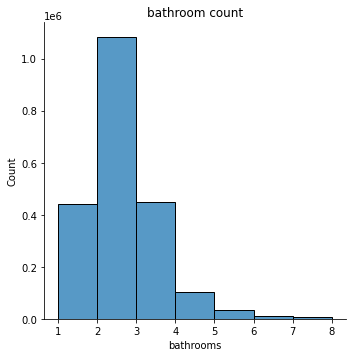

In [34]:
sns.displot(x='bathrooms', data=df, bins=[1, 2, 3, 4, 5, 6, 7, 8])
plt.title('bathroom count')
plt.show()

([<matplotlib.axis.XTick at 0x7fc0718764f0>,
 [Text(100000.0, 0, '100k'),
  Text(150000.0, 0, '150k'),
  Text(200000.0, 0, '200k'),
  Text(250000.0, 0, '250k'),
  Text(300000.0, 0, '300k'),
  Text(350000.0, 0, '350k'),
  Text(400000.0, 0, '400k'),
  Text(450000.0, 0, '450k'),
  Text(500000.0, 0, '500k'),
  Text(550000.0, 0, '550k'),
  Text(600000.0, 0, '600k'),
  Text(650000.0, 0, '650k'),
  Text(700000.0, 0, '700k'),
  Text(750000.0, 0, '750k'),
  Text(800000.0, 0, '800k'),
  Text(850000.0, 0, '850k'),
  Text(900000.0, 0, '900k'),
  Text(950000.0, 0, '950k'),
  Text(1000000.0, 0, '1m')])

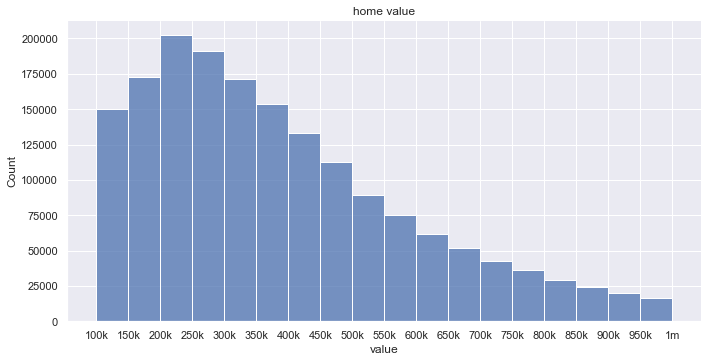

In [35]:
sns.set(rc={'figure.figsize':(18 , 8)})
sns.displot(x='value', data=df, bins=[100000.0, 150000.0, 200000.0, 250000.0, 300000.0, 350000.0, 400000.0, 450000.0, 500000.0, 550000.0, 600000.0, 650000.0, 700000.0, 750000.0, 800000.0, 850000.0, 900000.0, 950000.0, 1000000.0], height= 5, aspect = 2)
plt.title('home value')
plt.xticks([100000.0, 150000.0, 200000.0, 250000.0, 300000.0, 350000.0, 400000.0, 450000.0, 500000.0, 550000.0, 600000.0, 650000.0, 700000.0, 750000.0, 800000.0, 850000.0, 900000.0, 950000.0, 1000000.0], ['100k', '150k', '200k', '250k', '300k', '350k', '400k', '450k', '500k', '550k', '600k', '650k', '700k', '750k', '800k', '850k', '900k', '950k', '1m'])

([<matplotlib.axis.XTick at 0x7fc05fcc6b20>,
 [Text(0.0, 0, '0.00'),
  Text(250000.0, 0, '0.25'),
  Text(500000.0, 0, '0.50'),
  Text(750000.0, 0, '0.75'),
  Text(1000000.0, 0, '1.00'),
  Text(1250000.0, 0, '1.25'),
  Text(1500000.0, 0, '1.50'),
  Text(1750000.0, 0, '1.75'),
  Text(2000000.0, 0, '2.00'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

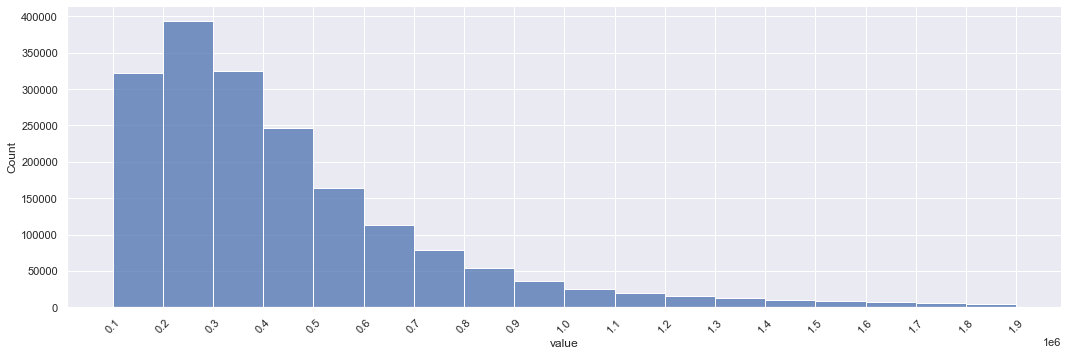

In [56]:
my_range_value =list(range(100000,2000000, 100000))
sns.set(rc={'figure.figsize':(18 , 8)})
sns.displot(x='value', data=df, bins=my_range_value, height=5, aspect=3)
plt.xticks(my_range_value, rotation=45)

In [36]:
np.quantile(df.value, .92)

941566.0

bins=[100000.0, 150000.0, 200000.0, 250000.0, 300000.0, 350000.0, 400000.0, 450000.0, 500000.0, 550000.0, 600000.0, 650000.0, 700000.0, 750000.0, 800000.0, 850000.0, 900000.0], ec="k")

([<matplotlib.axis.XTick at 0x7fc06e70c4f0>,
 [Text(1880.0, 0, '1880'),
  Text(1900.0, 0, '1900'),
  Text(1920.0, 0, '1920'),
  Text(1940.0, 0, '1940'),
  Text(1960.0, 0, '1960'),
  Text(1980.0, 0, '1980'),
  Text(2000.0, 0, '2000'),
  Text(2020.0, 0, '2020'),
  Text(2040.0, 0, '2040'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

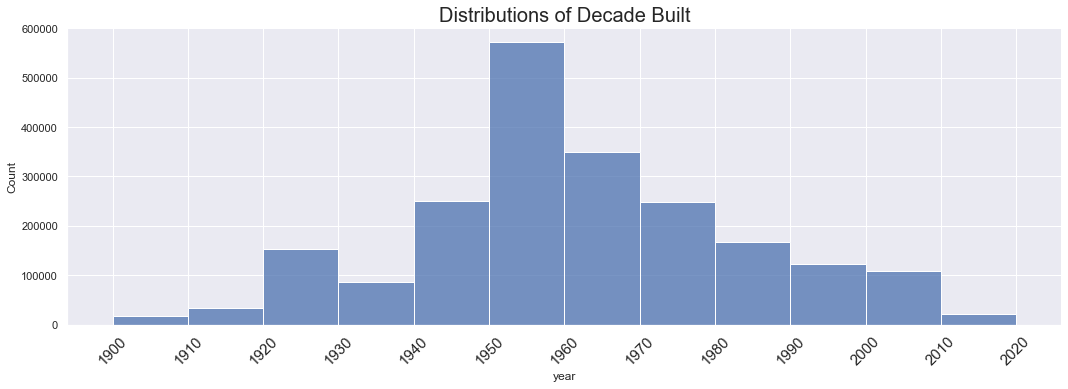

In [53]:
my_range =list(range(1900,2030, 10))

sns.set(rc={'figure.figsize':(18 , 8)})
sns.displot(x='year', data=df, bins=my_range, height=5, aspect=3)
plt.title('Distributions of Decade Built', fontsize= 20)
plt.xticks(my_range, rotation=45, fontsize= 15)

In [38]:
df.year.value_counts()

1955    84195
1950    71520
1954    68954
1953    62174
1956    61744
        ...  
1855        1
1879        1
1833        1
1840        1
1874        1
Name: year, Length: 153, dtype: int64

Notes:

    -make wrangle function better with new drops in code
    -add some markdowns & comments to make it easier later
    -add csv to acquire so getting data is faster
    -remove outliers- think who is visiting zillow, probably not movie stars and whatnot with multi-m budget, can remove very high square footage (ie. 25,000), that'd be the above 2m range
    -also look at more than 6 bathrooms and bedrooms. look at how much data we will lose first